# Exploratory Data Analysis (EDA)
## Heart Disease Prediction – MLOps Assignment

**Dataset:** UCI Heart Disease Dataset  
**Objective:** Understand data distribution, relationships, and class balance  


# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


# Load Dataset

In [2]:
import pandas as pd

base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"
data_files = [
    "processed.cleveland.data",
    "processed.hungarian.data",
    "processed.switzerland.data",
    "processed.va.data"
]

columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

dfs = []
for file in data_files:
    url = base_url + file
    df = pd.read_csv(url, names=columns)
    df.replace("?", pd.NA, inplace=True)
    df = df.apply(pd.to_numeric)
    df.dropna(inplace=True)
    df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    float64
 1   sex       299 non-null    float64
 2   cp        299 non-null    float64
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.8 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.464883
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,0.499601
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


#Target Variable Distribution (Class Balance)

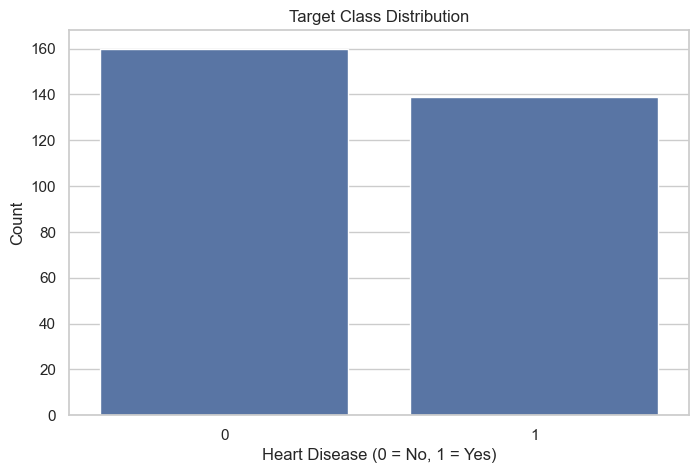

In [5]:
sns.countplot(x="target", data=df)
plt.title("Target Class Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Age Distribution

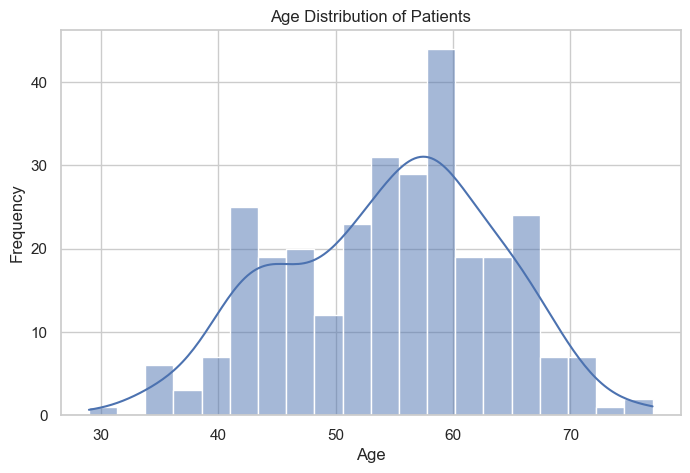

In [6]:
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Cholesterol Distribution

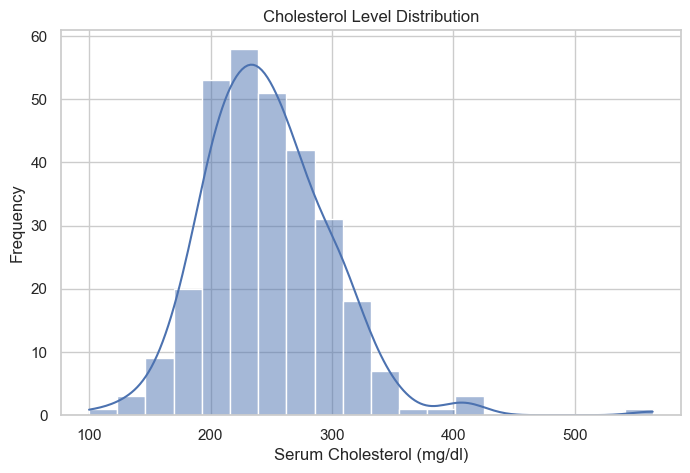

In [7]:
sns.histplot(df["chol"], bins=20, kde=True)
plt.title("Cholesterol Level Distribution")
plt.xlabel("Serum Cholesterol (mg/dl)")
plt.ylabel("Frequency")
plt.show()


# Correlation Heatmap

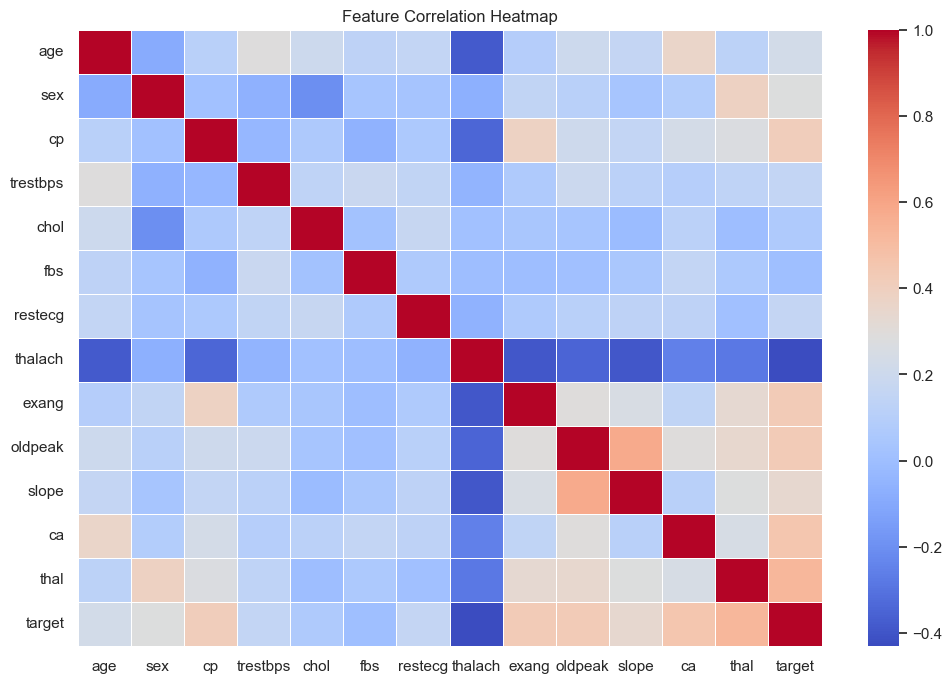

In [8]:
corr = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature vs Target (Key Clinical Insights)

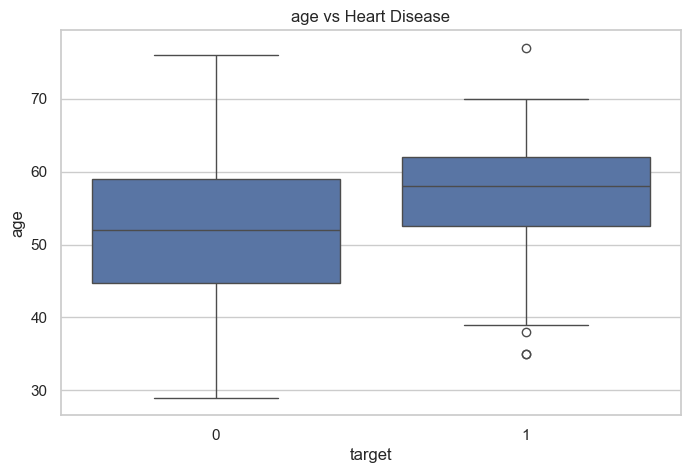

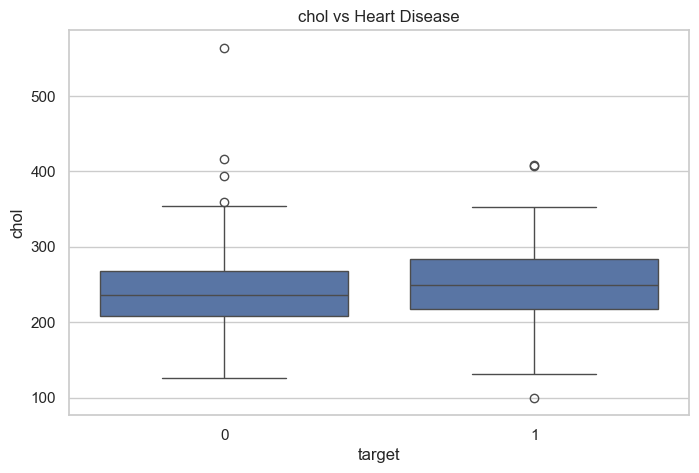

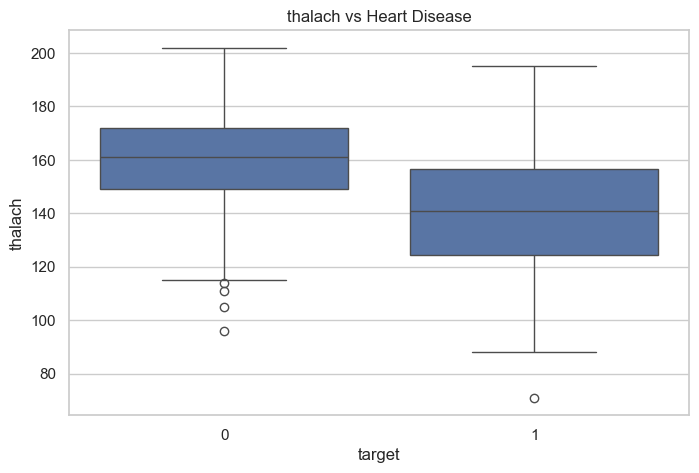

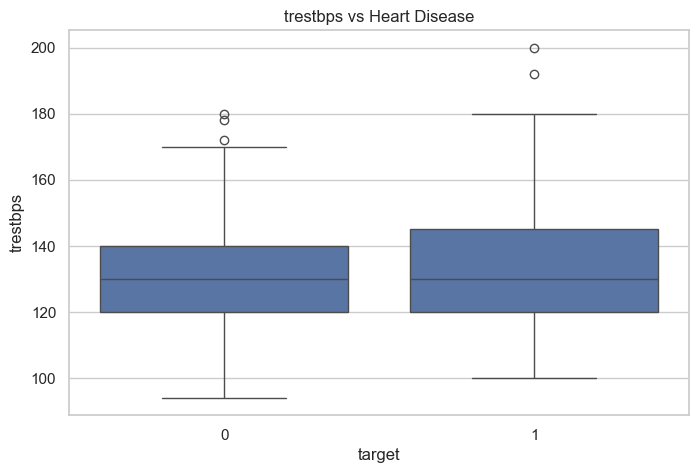

In [9]:
features = ["age", "chol", "thalach", "trestbps"]

for feature in features:
    sns.boxplot(x="target", y=feature, data=df)
    plt.title(f"{feature} vs Heart Disease")
    plt.show()


# Categorical Feature Analysis

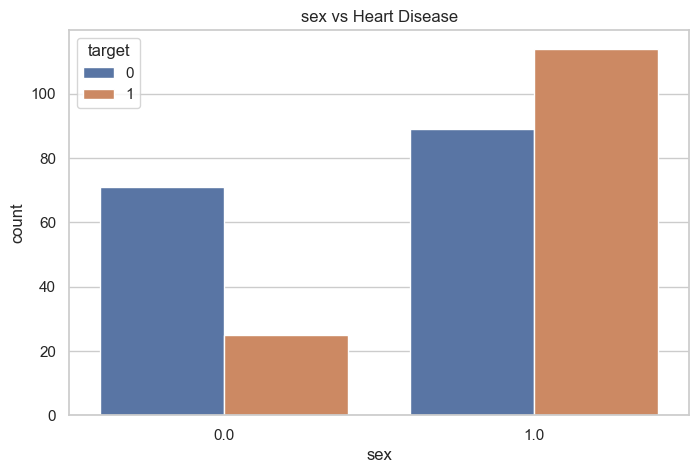

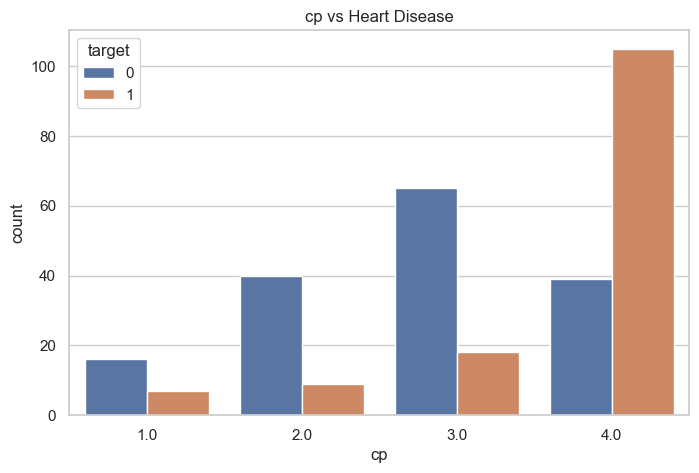

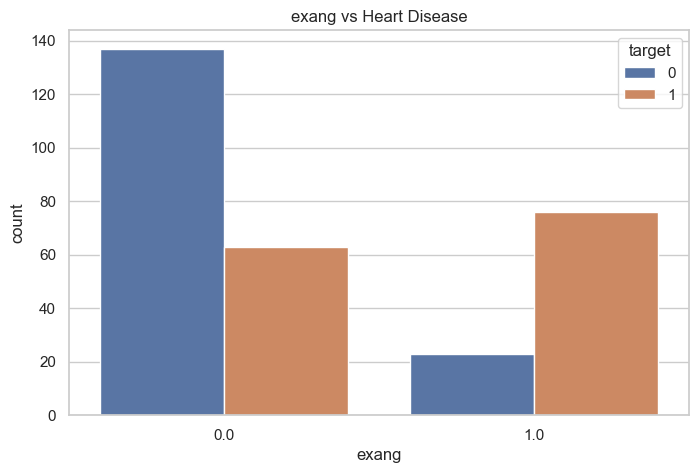

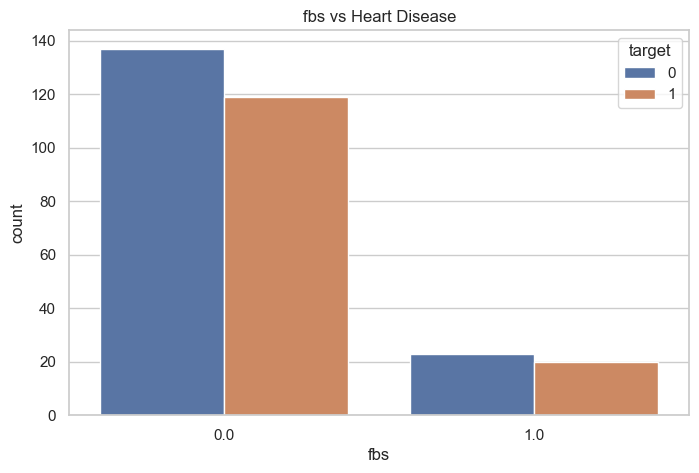

In [10]:
categorical_features = ["sex", "cp", "exang", "fbs"]

for col in categorical_features:
    sns.countplot(x=col, hue="target", data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.show()


## EDA Summary

- The dataset contains clean and well-structured clinical data.
- Target classes are reasonably balanced.
- Age, maximum heart rate, and exercise-induced angina show strong relationships with heart disease.
- Correlation analysis guided feature standardization and model selection.
